# 02 Производство сетей
### UKRAINE--POLITICAL CONDITIONS
Производство сетей на основе манипуляции с общей таблицей

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx

## 1. Читаем общую таблицу по голосованиям с диска

In [9]:
votes_table_com = pd.read_csv('votes_table.csv')
votes_table_com

,Data,Resolution,Title,Uri,Tags,Topic
0,2022-11-14,A/RES/ES-11/5,Furtherance of remedy and reparation for aggre...,https://digitallibrary.un.org/record/3994052,"['russia', 'ukraine', 'war']",UKRAINE--POLITICAL CONDITIONS
1,2022-10-12,A/RES/ES-11/4,Territorial integrity of Ukraine : defending t...,https://digitallibrary.un.org/record/3990400,"['russia', 'ukraine', 'war']",UKRAINE--POLITICAL CONDITIONS
2,2022-04-07,A/RES/ES-11/3,Suspension of the rights of membership of the ...,https://digitallibrary.un.org/record/3967778,"['russia', 'ukraine', 'war']",UKRAINE--POLITICAL CONDITIONS
3,2022-03-24,A/RES/ES-11/2,Humanitarian consequences of the aggression ag...,https://digitallibrary.un.org/record/3965954,"['russia', 'ukraine', 'war']",UKRAINE--POLITICAL CONDITIONS
4,2022-03-02,A/RES/ES-11/1,Aggression against Ukraine : resolution / adop...,https://digitallibrary.un.org/record/3959039,"['russia', 'ukraine', 'war']",UKRAINE--POLITICAL CONDITIONS
5,2022-11-30,A/RES/77/22,Committee on the Exercise of the Inalienable R...,https://digitallibrary.un.org/record/3996096,"['Palestine, Israel', 'war']",PALESTINE QUESTION
6,2022-11-30,A/RES/77/23,Division for Palestinian Rights of the Secreta...,https://digitallibrary.un.org/record/3996095,"['Palestine, Israel', 'war']",PALESTINE QUESTION
7,2022-11-30,A/RES/77/25,Peaceful settlement of the question of Palesti...,https://digitallibrary.un.org/record/3996093,"['Palestine, Israel', 'war']",PALESTINE QUESTION
8,2022-11-30,A/RES/77/24,Special information programme on the question ...,https://digitallibrary.un.org/record/3996092,"['Palestine, Israel', 'war']",PALESTINE QUESTION
9,2022-12-15,A/RES/77/228,Situation of human rights in the Islamic Repub...,https://digitallibrary.un.org/record/3997720,['Iran'],HUMAN RIGHTS--REPORTS


## 2. Data processing

In [1565]:
# редактирование таблицы
# votes_table_com.drop([0, 1])

In [5]:
# редактирование тэгов резолюции

In [ ]:
# Агрегация общей таблицы для производства сети

In [10]:
#topic = 'PALESTINE QUESTION'
topic = 'HUMAN RIGHTS--REPORTS'
topic = 'UKRAINE--POLITICAL CONDITIONS'
votes_table_com = votes_table_com[votes_table_com['Topic'] == topic]
votes_table_com

,Data,Resolution,Title,Uri,Tags,Topic
0,2022-11-14,A/RES/ES-11/5,Furtherance of remedy and reparation for aggre...,https://digitallibrary.un.org/record/3994052,"['russia', 'ukraine', 'war']",UKRAINE--POLITICAL CONDITIONS
1,2022-10-12,A/RES/ES-11/4,Territorial integrity of Ukraine : defending t...,https://digitallibrary.un.org/record/3990400,"['russia', 'ukraine', 'war']",UKRAINE--POLITICAL CONDITIONS
2,2022-04-07,A/RES/ES-11/3,Suspension of the rights of membership of the ...,https://digitallibrary.un.org/record/3967778,"['russia', 'ukraine', 'war']",UKRAINE--POLITICAL CONDITIONS
3,2022-03-24,A/RES/ES-11/2,Humanitarian consequences of the aggression ag...,https://digitallibrary.un.org/record/3965954,"['russia', 'ukraine', 'war']",UKRAINE--POLITICAL CONDITIONS
4,2022-03-02,A/RES/ES-11/1,Aggression against Ukraine : resolution / adop...,https://digitallibrary.un.org/record/3959039,"['russia', 'ukraine', 'war']",UKRAINE--POLITICAL CONDITIONS


## 3. Net making

###  3.1 Создание сводной таблицамы голосований

In [11]:
vote_array = [] # массив из таблиц голосований, полученных из файлов

votes_table_com['Resolution'].apply(
    lambda x: vote_array.append(
        pd.read_csv('resolution_vote/' + x.replace('/', '_') + '.csv', index_col = 'Country')
    )
)

0    None
1    None
2    None
3    None
4    None
Name: Resolution, dtype: object

In [12]:
len(vote_array)

5

In [13]:
vote_array[0]

,A/RES/ES-11/5
Country,
AFGHANISTAN,1.0
ALBANIA,1.0
ALGERIA,0.0
ANDORRA,1.0
ANGOLA,0.0
...,...
VENEZUELA (BOLIVARIAN REPUBLIC OF),NaN
VIET NAM,0.0
YEMEN,0.0


In [14]:
# Merge table

common_table = vote_array[0]

for index in range(1, len(vote_array)):
    common_table = pd.merge(common_table, vote_array[index], how='outer', left_index=True, right_index=True) 

In [15]:
common_table.head()

,A/RES/ES-11/5,A/RES/ES-11/4,A/RES/ES-11/3,A/RES/ES-11/2,A/RES/ES-11/1
Country,,,,,
AFGHANISTAN,1.0,1.0,NaN,1.0,1.0
ALBANIA,1.0,1.0,1.0,1.0,1.0
ALGERIA,0.0,0.0,-1.0,0.0,0.0
ANDORRA,1.0,1.0,1.0,1.0,1.0
ANGOLA,0.0,1.0,0.0,0.0,0.0


In [8]:
len(common_table.index)

196

### 3.2 Убираем разное написание Турции

In [32]:
common_table[common_table.index == 'AFGHANISTAN']

,A/RES/ES-11/5,A/RES/ES-11/4,A/RES/ES-11/3,A/RES/ES-11/2,A/RES/ES-11/1
Country,,,,,
AFGHANISTAN,1.0,1.0,NaN,1.0,1.0


In [17]:
common_table[common_table.index == 'TURKEY']

,A/RES/ES-11/5,A/RES/ES-11/4,A/RES/ES-11/3,A/RES/ES-11/2,A/RES/ES-11/1
Country,,,,,
TURKEY,NaN,NaN,1.0,1.0,1.0


In [20]:
common_table[common_table.index == 'TURKIYE']

,A/RES/ES-11/5,A/RES/ES-11/4,A/RES/ES-11/3,A/RES/ES-11/2,A/RES/ES-11/1
Country,,,,,
TURKIYE,1.0,NaN,NaN,NaN,NaN


In [19]:
common_table[common_table.index == 'TÜRKIYE']

,A/RES/ES-11/5,A/RES/ES-11/4,A/RES/ES-11/3,A/RES/ES-11/2,A/RES/ES-11/1
Country,,,,,
TÜRKIYE,NaN,1.0,NaN,NaN,NaN


In [36]:
#list(common_table[(common_table.index == 'TURKEY') + (common_table.index == 'TURKIYE') + (common_table.index == 'TÜRKIYE')].sum())

In [37]:
common_table.loc[["TURKEY", "TURKIYE", 'TÜRKIYE'], list(common_table.columns)]

,A/RES/ES-11/5,A/RES/ES-11/4,A/RES/ES-11/3,A/RES/ES-11/2,A/RES/ES-11/1
Country,,,,,
TURKEY,NaN,NaN,1.0,1.0,1.0
TURKIYE,1.0,NaN,NaN,NaN,NaN
TÜRKIYE,NaN,1.0,NaN,NaN,NaN


In [21]:
common_table.loc['TURKIYE'] = common_table.loc[["TURKEY", "TURKIYE", 'TÜRKIYE'], list(common_table.columns)].sum()
common_table.drop(["TURKEY", 'TÜRKIYE'], inplace = True)

In [22]:
common_table[common_table.index == 'TURKIYE']

,A/RES/ES-11/5,A/RES/ES-11/4,A/RES/ES-11/3,A/RES/ES-11/2,A/RES/ES-11/1
Country,,,,,
TURKIYE,1.0,1.0,1.0,1.0,1.0


###  3.2 Вычисление показателя солидарности для каждого голосования

In [23]:
# принимает таблицу с рещультатами голосования common_table
# возвращает два массива c парной узлов (ребром)

def get_edges(table):
    nodes_1 = []
    nodes_2 = []
    count_index = len(common_table.index)
    
    for index_first in range(0, count_index-1):
        for index_second in range(index_first+1, count_index):

            nodes_1.append(table.index[index_first])
            nodes_2.append(table.index[index_second])
        
    return [nodes_1, nodes_2]

In [24]:
# принимает таблицу с результатами голосования из common_table и название расчетного столбца голосования 
# возвращает массив оценки солидарности шголосования solid_val

def get_solid_val(table, item):
    solid_val = []
    count_index = len(table.index)
    
    for index_first in range(0, count_index-1):
        for index_second in range(index_first+1, count_index):
            
            # сравнение индексов голосования
            if (pd.isnull(table.iloc[index_first][item]) or pd.isnull(table.iloc[index_second][item])): 
                solid_val.append(np.nan) 
            else: 
                # Это значит, что если оба воздержались, то 0 == 0 это True
                solid_val.append(table.iloc[index_first][item] == table.iloc[index_second][item])
                # Нужно ли давать 1 если 1 == 1, -1 если -1 == -1... как быть с 0?
            
    return solid_val

In [25]:
#
# ЗАГРУЗНЫЙ ПРЦЕСС !!!!!
#
# создаем таблицу ребер сети

net_table = pd.DataFrame()

# создаем все ребра сети
nodes_arr = get_edges(common_table)
net_table['Nodes_1'] = nodes_arr[0]
net_table['Nodes_2'] = nodes_arr[1]

# заполняем результаты голосований
for item in common_table.columns: 
    net_table[item] = get_solid_val(common_table, item)

net_table

,Nodes_1,Nodes_2,A/RES/ES-11/5,A/RES/ES-11/4,A/RES/ES-11/3,A/RES/ES-11/2,A/RES/ES-11/1
0,AFGHANISTAN,ALBANIA,True,True,NaN,True,True
1,AFGHANISTAN,ALGERIA,False,False,NaN,False,False
2,AFGHANISTAN,ANDORRA,True,True,NaN,True,True
3,AFGHANISTAN,ANGOLA,False,True,NaN,False,False
4,AFGHANISTAN,ANTIGUA AND BARBUDA,False,True,NaN,True,True
...,...,...,...,...,...,...,...
18716,VIET NAM,ZAMBIA,False,False,NaN,False,False
18717,VIET NAM,ZIMBABWE,False,True,True,True,True
18718,YEMEN,ZAMBIA,False,True,NaN,True,True
18719,YEMEN,ZIMBABWE,False,False,False,False,False


In [26]:
#net_table[net_table['Nodes_1'] == 'RUSSIAN FEDERATION']
#net_table[((net_table['Nodes_1'] == 'THAILAND') & (net_table['Nodes_2'] == 'ANTIGUA AND BARBUDA'))]

#RUSSIAN FEDERATION


### 3.3 Вычисление коэффициента солидарности (веса) для каждого из ребер

`Solid_val` коэффициент солидарности (вес ребер)

In [33]:
#net_table_weight = net_table.replace({True: 1, False: -1})
net_table_weight = net_table.replace({True: 1, False: 0})

#net_table_weight = net_table

net_table_weight['Solid_val'] = abs(net_table_weight[list(net_table_weight.columns)[2:]].sum(axis=1))
#net_table_weight['Solid_val'] = net_table_weight[list(net_table_weight.columns)[2:]].sum(axis=1)


#net_table_weight.drop(list(net_table_weight.columns)[2:-1], inplace=True, axis=1)

#net_table_weight = net_table_weight[net_table_weight.Solid_val != 0]
# выбираем все значения больще n
net_table_weight = net_table_weight[net_table_weight.Solid_val >=0]

net_table_weight

,Nodes_1,Nodes_2,A/RES/ES-11/5,A/RES/ES-11/4,A/RES/ES-11/3,A/RES/ES-11/2,A/RES/ES-11/1,Solid_val
0,AFGHANISTAN,ALBANIA,1.0,1.0,NaN,1.0,1.0,4.0
1,AFGHANISTAN,ALGERIA,0.0,0.0,NaN,0.0,0.0,0.0
2,AFGHANISTAN,ANDORRA,1.0,1.0,NaN,1.0,1.0,4.0
3,AFGHANISTAN,ANGOLA,0.0,1.0,NaN,0.0,0.0,1.0
4,AFGHANISTAN,ANTIGUA AND BARBUDA,0.0,1.0,NaN,1.0,1.0,3.0
...,...,...,...,...,...,...,...,...
18716,VIET NAM,ZAMBIA,0.0,0.0,NaN,0.0,0.0,0.0
18717,VIET NAM,ZIMBABWE,0.0,1.0,1.0,1.0,1.0,4.0
18718,YEMEN,ZAMBIA,0.0,1.0,NaN,1.0,1.0,3.0
18719,YEMEN,ZIMBABWE,0.0,0.0,0.0,0.0,0.0,0.0


In [28]:
#net_table[net_table['Nodes_1'] == 'RUSSIAN FEDERATION']
#net_table_weight[((net_table_weight['Nodes_1'] == 'AFGHANISTAN') & (net_table_weight['Nodes_2'] == 'ANTIGUA AND BARBUDA'))]


####  Немного статистики

In [295]:
set(net_table_weight['Solid_val'].isna())

{False}

In [294]:
len(net_table_weight)

18721

In [288]:
#len(net_table_weight['Solid_val'][net_table_weight['Solid_val'] == 5])

In [289]:
len(net_table_weight['Solid_val'])
#len(net_table_weight['Solid_val'][net_table_weight['Solid_val'] == 0])

18721

(array([5290.,    0.,    0., 1765.,    0.,    0.,    0., 1599.,    0.,
           0., 3478.,    0.,    0.,    0., 3369.,    0.,    0., 3220.]),
 array([0.        , 0.27777778, 0.55555556, 0.83333333, 1.11111111,
        1.38888889, 1.66666667, 1.94444444, 2.22222222, 2.5       ,
        2.77777778, 3.05555556, 3.33333333, 3.61111111, 3.88888889,
        4.16666667, 4.44444444, 4.72222222, 5.        ]),
 <BarContainer object of 18 artists>)

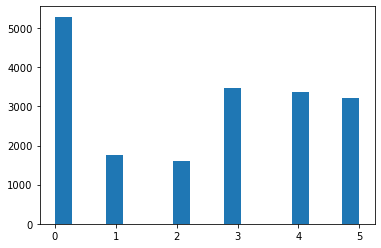

In [290]:
plt.hist(net_table_weight['Solid_val'], bins=18)

### 3.3 Строим сеть 

In [291]:
G = nx.Graph()
#G.add_nodes_from(list(common_table.index))
net_table_weight.apply(lambda x: G.add_edge(x[0], x[1], weight= x[2]), axis=1)

0        None
1        None
2        None
3        None
4        None
         ... 
18716    None
18717    None
18718    None
18719    None
18720    None
Length: 18721, dtype: object

In [296]:
len(G.nodes())

194

In [255]:
G.edges()

EdgeView([('ALBANIA', 'ANDORRA'), ('ALBANIA', 'ARGENTINA'), ('ALBANIA', 'AUSTRALIA'), ('ALBANIA', 'AUSTRIA'), ('ALBANIA', 'BELGIUM'), ('ALBANIA', 'BOSNIA AND HERZEGOVINA'), ('ALBANIA', 'BULGARIA'), ('ALBANIA', 'CANADA'), ('ALBANIA', 'CHAD'), ('ALBANIA', 'CHILE'), ('ALBANIA', 'COLOMBIA'), ('ALBANIA', 'COSTA RICA'), ('ALBANIA', 'CROATIA'), ('ALBANIA', 'CYPRUS'), ('ALBANIA', 'CZECHIA'), ('ALBANIA', 'DENMARK'), ('ALBANIA', 'DOMINICAN REPUBLIC'), ('ALBANIA', 'ECUADOR'), ('ALBANIA', 'ESTONIA'), ('ALBANIA', 'FIJI'), ('ALBANIA', 'FINLAND'), ('ALBANIA', 'FRANCE'), ('ALBANIA', 'GEORGIA'), ('ALBANIA', 'GERMANY'), ('ALBANIA', 'GREECE'), ('ALBANIA', 'GUATEMALA'), ('ALBANIA', 'HUNGARY'), ('ALBANIA', 'ICELAND'), ('ALBANIA', 'IRELAND'), ('ALBANIA', 'ITALY'), ('ALBANIA', 'JAPAN'), ('ALBANIA', 'KIRIBATI'), ('ALBANIA', 'LATVIA'), ('ALBANIA', 'LIBERIA'), ('ALBANIA', 'LIECHTENSTEIN'), ('ALBANIA', 'LITHUANIA'), ('ALBANIA', 'LUXEMBOURG'), ('ALBANIA', 'MALAWI'), ('ALBANIA', 'MALTA'), ('ALBANIA', 'MARSHALL ISL

In [256]:
nx.is_connected(G)

False

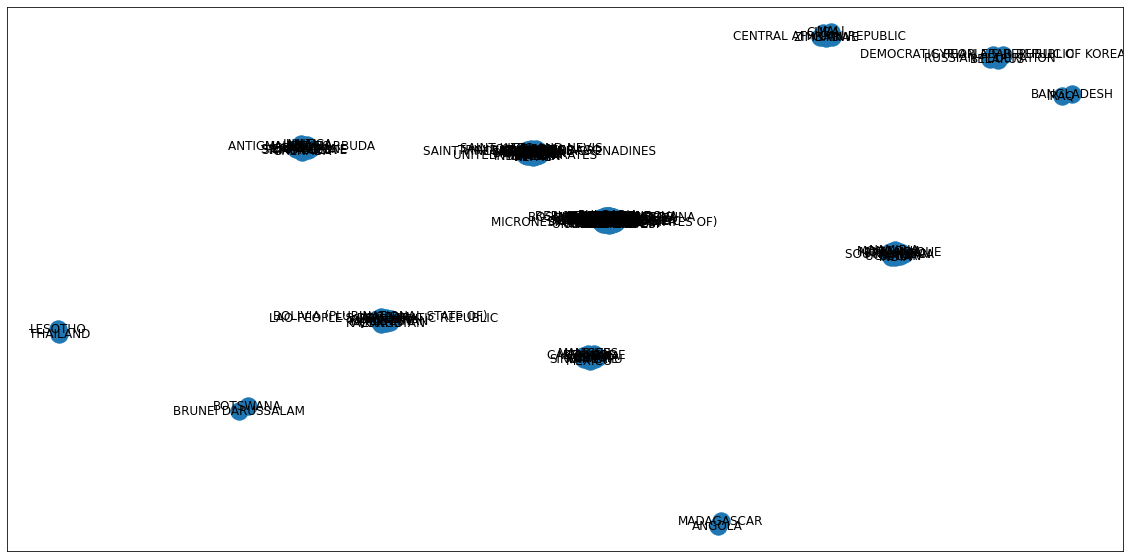

In [257]:
figure(figsize=(20, 10))
nx.draw_networkx(G)

In [258]:
print(len(sorted(nx.connected_components(G))))
print(len(G.nodes()))

12
154


In [259]:
print(round(nx.average_clustering(G), 2))
print(round(nx.transitivity(G), 2))

0.95
1.0


In [159]:
#country_name = 'TURKIYE'
country_name = 'RUSSIAN FEDERATION'
#country_name = 'UNITED STATES'
#country_name = 'IRAN'
#UNITED STATES OF AMERICA

for index in range (0, len(list(nx.connected_components(G)))):
    print('')
    print(index)
    
    if country_name in list(nx.connected_components(G))[index]: print('True')
    else: print('False')
        
    print('')
    
    country_arr_test = list(nx.connected_components(G))[index]
    print(country_arr_test)
    print('______________')





0
True

{'DEMOCRATIC REPUBLIC OF THE CONGO', 'CZECHIA', 'HONDURAS', 'GRENADA', 'EGYPT', 'MOROCCO', 'PAPUA NEW GUINEA', 'ARMENIA', 'GUINEA', 'VANUATU', 'MALDIVES', 'NAURU', 'CYPRUS', 'BULGARIA', 'SINGAPORE', 'GUINEA-BISSAU', 'ESWATINI', 'MONACO', 'ECUADOR', 'ESTONIA', 'SOUTH AFRICA', 'DOMINICA', 'ANGOLA', 'AUSTRALIA', 'ICELAND', 'NAMIBIA', 'BRAZIL', 'DENMARK', 'GEORGIA', 'KIRIBATI', 'LESOTHO', 'KYRGYZSTAN', 'ITALY', 'TIMOR-LESTE', 'CENTRAL AFRICAN REPUBLIC', 'UNITED KINGDOM', 'UZBEKISTAN', 'CAMEROON', 'MAURITANIA', 'TRINIDAD AND TOBAGO', "COTE D'IVOIRE", 'MALAYSIA', 'TAJIKISTAN', "DEMOCRATIC PEOPLE'S REPUBLIC OF KOREA", 'JORDAN', "CÔTE D'IVOIRE", 'NORTH MACEDONIA', 'COMOROS', 'THAILAND', 'BOSNIA AND HERZEGOVINA', 'SOLOMON ISLANDS', 'EQUATORIAL GUINEA', 'MALTA', 'RUSSIAN FEDERATION', 'LIECHTENSTEIN', 'KUWAIT', 'LIBYA', 'PORTUGAL', 'ARGENTINA', 'BENIN', 'FINLAND', 'SENEGAL', 'AFGHANISTAN', 'BANGLADESH', 'NICARAGUA', 'HAITI', 'BELGIUM', 'SURINAME', 'PERU', 'MALAWI', 'BAHAMAS', 'LIBERIA', 

### 3.4  Профили голосования по теме:

In [297]:
# Ищем по первой букве
#common_table[common_table.index == 'AZERBAIJAN']
#common_table[common_table.index == 'TURKMENISTAN']
#common_table[common_table.index == 'VENEZUELA (BOLIVARIAN REPUBLIC OF)']
common_table[common_table.index == 'BURKINA FASO']

,A/RES/ES-11/5,A/RES/ES-11/4,A/RES/ES-11/3,A/RES/ES-11/2,A/RES/ES-11/1
Country,,,,,
BURKINA FASO,NaN,NaN,NaN,NaN,NaN


In [99]:
common_table[common_table.index == 'AZERBAIJAN']

,A/RES/ES-11/5,A/RES/ES-11/4,A/RES/ES-11/3,A/RES/ES-11/2,A/RES/ES-11/1
Country,,,,,
AZERBAIJAN,NaN,NaN,NaN,NaN,NaN


In [77]:
common_table[common_table.index == 'NEPAL']

,A/RES/ES-11/5,A/RES/ES-11/4,A/RES/ES-11/3,A/RES/ES-11/2,A/RES/ES-11/1
Country,,,,,
NEPAL,0.0,1.0,0.0,1.0,1.0


In [111]:
common_table[common_table.index == 'RUSSIAN FEDERATION']

,A/RES/ES-11/5,A/RES/ES-11/4,A/RES/ES-11/3,A/RES/ES-11/2,A/RES/ES-11/1
Country,,,,,
RUSSIAN FEDERATION,-1.0,-1.0,-1.0,-1.0,-1.0


In [1430]:
net_table[((net_table['Nodes_1'] == 'LESOTHO') & (net_table['Nodes_2'] == 'THAILAND'))]

,Nodes_1,Nodes_2,A/RES/ES-11/5,A/RES/ES-11/4,A/RES/ES-11/3,A/RES/ES-11/2,A/RES/ES-11/1
14042,LESOTHO,THAILAND,True,True,True,True,True


In [1432]:
net_table[net_table['Nodes_1'] == 'LESOTHO']

,Nodes_1,Nodes_2,A/RES/ES-11/5,A/RES/ES-11/4,A/RES/ES-11/3,A/RES/ES-11/2,A/RES/ES-11/1
13968,LESOTHO,LIBERIA,False,False,False,True,True
13969,LESOTHO,LIBYA,True,False,False,True,True
13970,LESOTHO,LIECHTENSTEIN,False,False,False,True,True
13971,LESOTHO,LITHUANIA,False,False,False,True,True
13972,LESOTHO,LUXEMBOURG,False,False,False,True,True
...,...,...,...,...,...,...,...
14060,LESOTHO,VENEZUELA (BOLIVARIAN REPUBLIC OF),NaN,NaN,NaN,NaN,NaN
14061,LESOTHO,VIET NAM,True,True,False,False,False
14062,LESOTHO,YEMEN,True,False,True,True,True
14063,LESOTHO,ZAMBIA,False,False,NaN,True,True


### 3.5 Строим сеть с разными весами

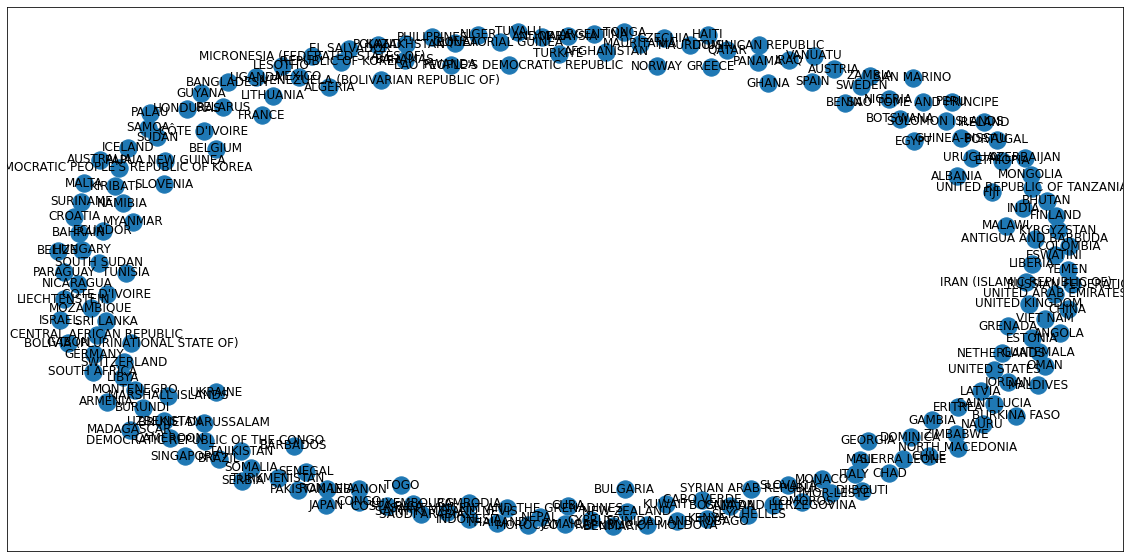

In [292]:
figure(figsize=(20, 10))

F = G.copy()
threshold = 6
F.remove_edges_from([(n1, n2) for n1, n2, w in F.edges(data="weight") if w < threshold])
#nx.draw(F)

pos = nx.spring_layout(F, seed=0)


for edge in F.edges(data='weight'):
    nx.draw_networkx_edges(F, pos, edgelist=[edge], width=edge[2] * edge[2])
       
nx.draw_networkx(F, pos) 

In [293]:
print(len(sorted(nx.connected_components(F))))
print(len(F.nodes()))

194
194


#### Связи -- единогласное голосования по всем резолюциям:

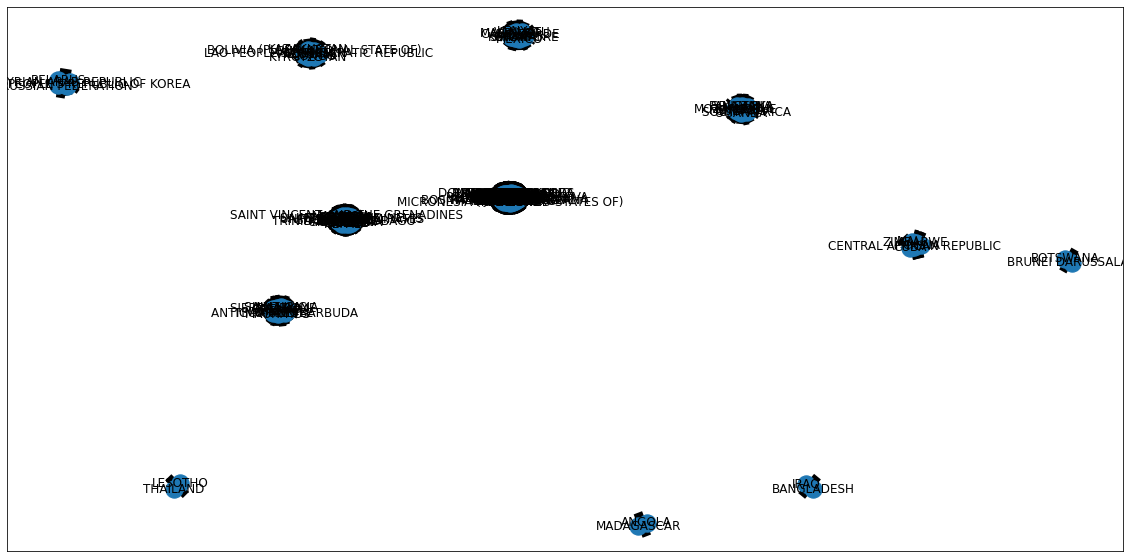

In [318]:
figure(figsize=(20, 10))

F = G.copy()
threshold = 5
F.remove_edges_from([(n1, n2) for n1, n2, w in F.edges(data="weight") if w < threshold])
#F.remove_nodes_from([(n1) for n1, n2, w in F.edges(data="weight") if w < threshold])
#nx.draw(F)
#net_table_weight.apply(lambda x: G.add_edge(x[0], x[1], weight= x[2]), axis=1)

# Для убирания отдельных нод
F5 = nx.Graph() 
F5.add_edges_from(F.edges(data = True))

pos = nx.spring_layout(F5, seed=0)

for edge in F5.edges(data='weight'):
    nx.draw_networkx_edges(F5, pos, edgelist=[edge], width=edge[2] * edge[2])
       
nx.draw_networkx(F5, pos) 

In [299]:
print(len(sorted(nx.connected_components(F5))))
print(len(F5.nodes()))

12
154


In [274]:
print(list(nx.connected_components(F))[1])

{'MALTA', 'SAMOA', 'CROATIA', 'CZECHIA', 'LIECHTENSTEIN', 'MICRONESIA (FEDERATED STATES OF)', 'NETHERLANDS', 'PORTUGAL', 'CHILE', 'ARGENTINA', 'FINLAND', 'PAPUA NEW GUINEA', 'SWEDEN', 'COLOMBIA', 'ROMANIA', 'URUGUAY', 'PHILIPPINES', 'BELGIUM', 'NEW ZEALAND', 'NAURU', 'CYPRUS', 'BULGARIA', 'SAN MARINO', 'PANAMA', 'PERU', 'SWITZERLAND', 'MALAWI', 'LIBERIA', 'UNITED STATES', 'GUATEMALA', 'COSTA RICA', 'MONACO', 'SEYCHELLES', 'ECUADOR', 'ESTONIA', 'PALAU', 'LITHUANIA', 'MONTENEGRO', 'AUSTRALIA', 'MARSHALL ISLANDS', 'ICELAND', 'DENMARK', 'FIJI', 'GERMANY', 'HUNGARY', 'GEORGIA', 'KIRIBATI', 'MYANMAR', 'TUVALU', 'ITALY', 'POLAND', 'UNITED KINGDOM', 'CHAD', 'NORWAY', 'UKRAINE', 'SLOVENIA', 'LATVIA', 'REPUBLIC OF MOLDOVA', 'AUSTRIA', 'ANDORRA', 'IRELAND', 'GREECE', 'DOMINICAN REPUBLIC', 'CANADA', 'NORTH MACEDONIA', 'JAPAN', 'PARAGUAY', 'FRANCE', 'LUXEMBOURG', 'ALBANIA', 'REPUBLIC OF KOREA', 'SLOVAKIA', 'TURKIYE', 'BOSNIA AND HERZEGOVINA', 'SPAIN'}


In [1562]:
country_name = 'IRAN (ISLAMIC REPUBLIC OF)'
country_name = 'HUNGARY'

for index in range (0, len(list(nx.connected_components(F)))):
    print('')
    print(index)
    
    if country_name in list(nx.connected_components(F))[index]: print('True')
    else: print('False')
        
    print('')
    
    country_arr_test = list(nx.connected_components(F))[index]
    print(country_arr_test)
    print('______________')


0
False

{'AFGHANISTAN'}
______________

1
True

{'CYPRUS', 'PARAGUAY', 'DOMINICAN REPUBLIC', 'GUATEMALA', 'PHILIPPINES', 'NEW ZEALAND', 'REPUBLIC OF KOREA', 'JAPAN', 'BOSNIA AND HERZEGOVINA', 'LITHUANIA', 'MALAWI', 'MALTA', 'AUSTRALIA', 'SEYCHELLES', 'CROATIA', 'BELGIUM', 'GERMANY', 'MONTENEGRO', 'FRANCE', 'SLOVENIA', 'PERU', 'PANAMA', 'SWEDEN', 'MICRONESIA (FEDERATED STATES OF)', 'ECUADOR', 'ARGENTINA', 'MYANMAR', 'HUNGARY', 'IRELAND', 'PAPUA NEW GUINEA', 'AUSTRIA', 'DENMARK', 'GEORGIA', 'TUVALU', 'ROMANIA', 'COSTA RICA', 'SPAIN', 'BULGARIA', 'COLOMBIA', 'UNITED KINGDOM', 'SLOVAKIA', 'CANADA', 'MONACO', 'REPUBLIC OF MOLDOVA', 'SAMOA', 'UNITED STATES', 'ALBANIA', 'CHILE', 'UKRAINE', 'ITALY', 'ICELAND', 'GREECE', 'NORTH MACEDONIA', 'FIJI', 'CHAD', 'SAN MARINO', 'MARSHALL ISLANDS', 'LATVIA', 'NETHERLANDS', 'POLAND', 'LIBERIA', 'SWITZERLAND', 'LIECHTENSTEIN', 'LUXEMBOURG', 'NORWAY', 'PALAU', 'KIRIBATI', 'PORTUGAL', 'NAURU', 'TURKEY', 'CZECHIA', 'FINLAND', 'URUGUAY', 'ESTONIA', 'ANDORRA'

#### Связи -- единогласное голосования по всем резолюциям + те, кто один раз воздержался

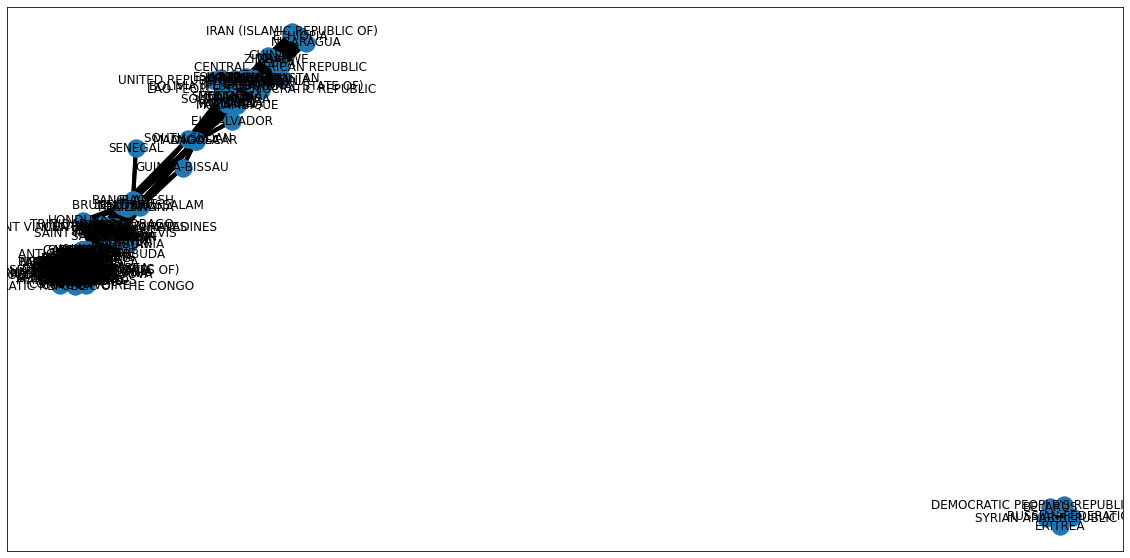

In [316]:
figure(figsize=(20, 10))

F = G.copy()
threshold = 4
F.remove_edges_from([(n1, n2) for n1, n2, w in F.edges(data="weight") if w < threshold])
#F.remove_nodes_from([(n1) for n1, n2, w in F.edges(data="weight") if w < threshold])
#nx.draw(F)
#net_table_weight.apply(lambda x: G.add_edge(x[0], x[1], weight= x[2]), axis=1)

# Для убирания отдельных нод
F45 = nx.Graph() 
F45.add_edges_from(F.edges(data = True))

pos = nx.spring_layout(F45, seed=0)

for edge in F45.edges(data='weight'):
    nx.draw_networkx_edges(F45, pos, edgelist=[edge], width=edge[2])
       
nx.draw_networkx(F45, pos) 

In [301]:
print(len(sorted(nx.connected_components(F45))))
print(len(F45.nodes()))

2
180


In [302]:
country_name = 'RUSSIAN FEDERATION'
#country_name = 'LESOTHO'
#country_name = 'NICARAGUA'

for index in range (0, len(list(nx.connected_components(F45)))):
    print('')
    print(index)
    
    if country_name in list(nx.connected_components(F45))[index]: print('True')
    else: print('False')
        
    print('')
    
    country_arr_test = list(nx.connected_components(F45))[index]
    print(country_arr_test)
    print('______________')


0
False

{'DEMOCRATIC REPUBLIC OF THE CONGO', 'CZECHIA', 'HONDURAS', 'GRENADA', 'EGYPT', 'ARMENIA', 'PAPUA NEW GUINEA', 'VANUATU', 'MALDIVES', 'NAURU', 'CYPRUS', 'BULGARIA', 'SINGAPORE', 'GUINEA-BISSAU', 'ESWATINI', 'MONACO', 'ECUADOR', 'ESTONIA', 'SOUTH AFRICA', 'ANGOLA', 'AUSTRALIA', 'ICELAND', 'NAMIBIA', 'BRAZIL', 'DENMARK', 'GEORGIA', 'KIRIBATI', 'LESOTHO', 'KYRGYZSTAN', 'ITALY', 'TIMOR-LESTE', 'UZBEKISTAN', 'UNITED KINGDOM', 'CENTRAL AFRICAN REPUBLIC', 'MAURITANIA', 'TRINIDAD AND TOBAGO', 'MALAYSIA', 'TAJIKISTAN', 'JORDAN', "CÔTE D'IVOIRE", 'NORTH MACEDONIA', 'COMOROS', 'THAILAND', 'BOSNIA AND HERZEGOVINA', 'SOLOMON ISLANDS', 'MALTA', 'LIECHTENSTEIN', 'KUWAIT', 'LIBYA', 'PORTUGAL', 'ARGENTINA', 'BENIN', 'FINLAND', 'SENEGAL', 'AFGHANISTAN', 'BANGLADESH', 'NICARAGUA', 'HAITI', 'BELGIUM', 'SURINAME', 'PERU', 'MALAWI', 'LIBERIA', 'BAHAMAS', 'GUATEMALA', 'SEYCHELLES', 'NEPAL', 'JAMAICA', 'SAUDI ARABIA', 'BURUNDI', 'PAKISTAN', 'MALI', 'MOZAMBIQUE', 'BRUNEI DARUSSALAM', 'IRAN (ISLAMIC R

#### Связи -- единогласное голосования по всем резолюциям + те, кто не более двух раз воздержался или один раз проголосовал против

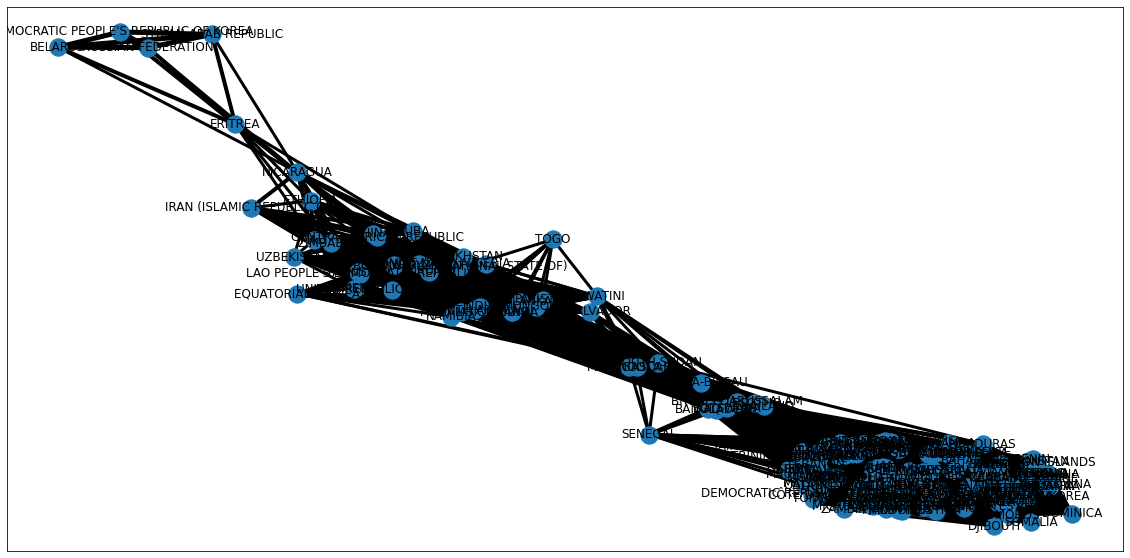

In [315]:
figure(figsize=(20, 10))

F = G.copy()
threshold = 3
F.remove_edges_from([(n1, n2) for n1, n2, w in F.edges(data="weight") if w < threshold])
#F.remove_nodes_from([(n1) for n1, n2, w in F.edges(data="weight") if w < threshold])
#nx.draw(F)
#net_table_weight.apply(lambda x: G.add_edge(x[0], x[1], weight= x[2]), axis=1)

# Для убирания отдельных нод
F345 = nx.Graph() 
F345.add_edges_from(F.edges(data = True))

pos = nx.spring_layout(F345, seed=0)

for edge in F345.edges(data='weight'):
    nx.draw_networkx_edges(F345, pos, edgelist=[edge], width=edge[2])
       
nx.draw_networkx(F345, pos) 

In [317]:
print(len(sorted(nx.connected_components(F345))))
print(len(F345.nodes()))

1
185


In [1548]:
country_name = 'RUSSIAN FEDERATION'
#country_name = 'LESOTHO'
#country_name = 'NICARAGUA'

for index in range (0, len(list(nx.connected_components(F)))):
    print('')
    print(index)
    
    if country_name in list(nx.connected_components(F))[index]: print('True')
    else: print('False')
        
    print('')
    
    country_arr_test = list(nx.connected_components(F))[index]
    print(country_arr_test)
    print('______________')


0
True

{'SENEGAL', 'SRI LANKA', 'PHILIPPINES', 'BOLIVIA (PLURINATIONAL STATE OF)', 'BELGIUM', 'MONTENEGRO', 'CONGO', 'LIBYA', 'GAMBIA', 'EL SALVADOR', 'ALGERIA', 'NIGER', 'TONGA', 'GRENADA', 'ECUADOR', 'ARGENTINA', 'HUNGARY', 'DENMARK', 'MALAYSIA', 'ROMANIA', 'MALI', 'COSTA RICA', 'UNITED KINGDOM', 'UNITED REPUBLIC OF TANZANIA', 'COLOMBIA', 'CABO VERDE', 'SAMOA', 'UZBEKISTAN', 'CUBA', 'CHILE', 'NICARAGUA', 'ERITREA', 'BRAZIL', 'GABON', 'GREECE', 'NIGERIA', 'CHAD', 'SAN MARINO', 'SINGAPORE', 'MALDIVES', 'SOMALIA', 'HONDURAS', 'DEMOCRATIC REPUBLIC OF THE CONGO', 'AFGHANISTAN', 'POLAND', 'ZAMBIA', 'IRAQ', 'GUYANA', 'LIBERIA', 'SOLOMON ISLANDS', 'NAMIBIA', 'LUXEMBOURG', 'ESWATINI', 'NORTH MACEDONIA', 'ANDORRA', 'CYPRUS', 'SAINT LUCIA', 'JORDAN', 'UNITED ARAB EMIRATES', 'BANGLADESH', 'KUWAIT', 'TIMOR-LESTE', 'CROATIA', 'MADAGASCAR', 'INDIA', 'PAPUA NEW GUINEA', 'MAURITANIA', 'GEORGIA', 'RWANDA', 'TUVALU', 'SURINAME', 'BULGARIA', 'UGANDA', 'SLOVAKIA', 'ITALY', 'BOTSWANA', 'OMAN', 'LATVIA',

#### Связи -- единогласное голосования по всем резолюциям + те, кто не более трех раз воздержался или ...

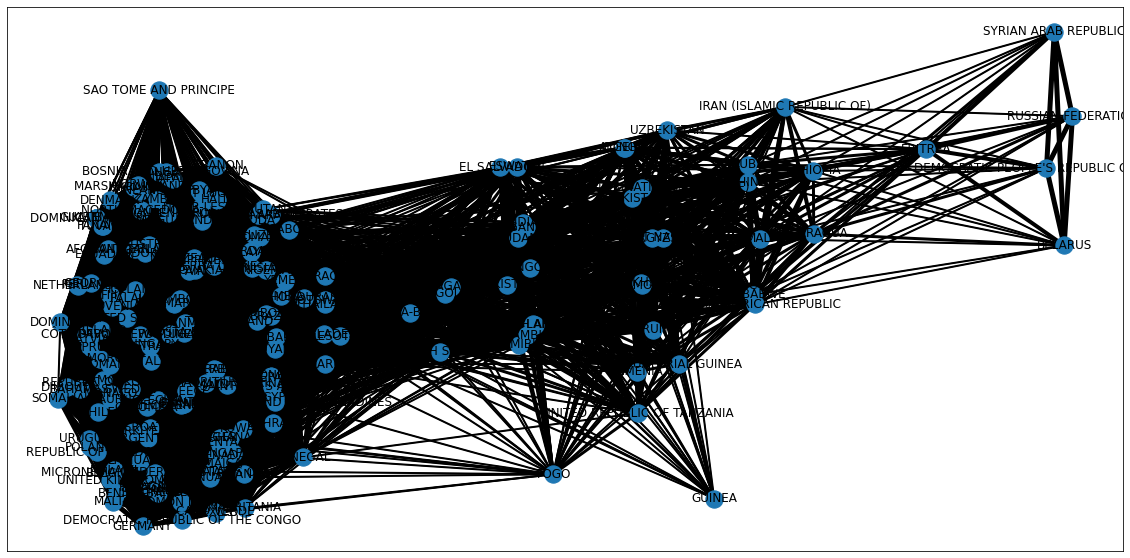

In [314]:
figure(figsize=(20, 10))

F = G.copy()
threshold = 2
F.remove_edges_from([(n1, n2) for n1, n2, w in F.edges(data="weight") if w < threshold])
#F.remove_nodes_from([(n1) for n1, n2, w in F.edges(data="weight") if w < threshold])
#nx.draw(F)
#net_table_weight.apply(lambda x: G.add_edge(x[0], x[1], weight= x[2]), axis=1)

# Для убирания отдельных нод
F2345 = nx.Graph() 
F2345.add_edges_from(F.edges(data = True))

pos = nx.spring_layout(F2345, seed=0)

for edge in F2345.edges(data='weight'):
    nx.draw_networkx_edges(F2345, pos, edgelist=[edge], width=edge[2])
       
nx.draw_networkx(F2345, pos) 

In [306]:
print(len(sorted(nx.connected_components(F2345))))
print(len(F2345.nodes()))

1
187


In [1551]:
country_name = 'RUSSIAN FEDERATION'
#country_name = 'LESOTHO'
#country_name = 'NICARAGUA'

for index in range (0, len(list(nx.connected_components(F)))):
    print('')
    print(index)
    
    if country_name in list(nx.connected_components(F))[index]: print('True')
    else: print('False')
        
    print('')
    
    country_arr_test = list(nx.connected_components(F))[index]
    print(country_arr_test)
    print('______________')


0
True

{'SENEGAL', 'SRI LANKA', 'PHILIPPINES', 'BOLIVIA (PLURINATIONAL STATE OF)', 'BELGIUM', 'MONTENEGRO', 'CONGO', 'LIBYA', 'GAMBIA', 'EL SALVADOR', 'ALGERIA', 'NIGER', 'TONGA', 'GRENADA', 'ECUADOR', 'ARGENTINA', 'HUNGARY', 'DENMARK', 'MALAYSIA', 'ROMANIA', 'MALI', 'COSTA RICA', 'UNITED KINGDOM', 'UNITED REPUBLIC OF TANZANIA', 'COLOMBIA', 'CABO VERDE', 'SAMOA', 'UZBEKISTAN', 'CUBA', 'CHILE', 'NICARAGUA', 'ERITREA', 'BRAZIL', 'GABON', 'GREECE', 'NIGERIA', 'SAO TOME AND PRINCIPE', 'CHAD', 'HONDURAS', 'SAN MARINO', 'MALDIVES', 'SINGAPORE', 'SOMALIA', 'DEMOCRATIC REPUBLIC OF THE CONGO', 'AFGHANISTAN', 'POLAND', 'ZAMBIA', 'IRAQ', 'GUYANA', 'LIBERIA', 'SOLOMON ISLANDS', 'NAMIBIA', 'LUXEMBOURG', 'ESWATINI', 'NORTH MACEDONIA', 'ANDORRA', 'CYPRUS', 'SAINT LUCIA', 'JORDAN', 'UNITED ARAB EMIRATES', 'BANGLADESH', 'KUWAIT', 'TIMOR-LESTE', 'CROATIA', 'MADAGASCAR', 'INDIA', 'PAPUA NEW GUINEA', 'MAURITANIA', 'GEORGIA', 'RWANDA', 'TUVALU', 'SURINAME', 'BULGARIA', 'UGANDA', 'SLOVAKIA', 'ITALY', 'BOT

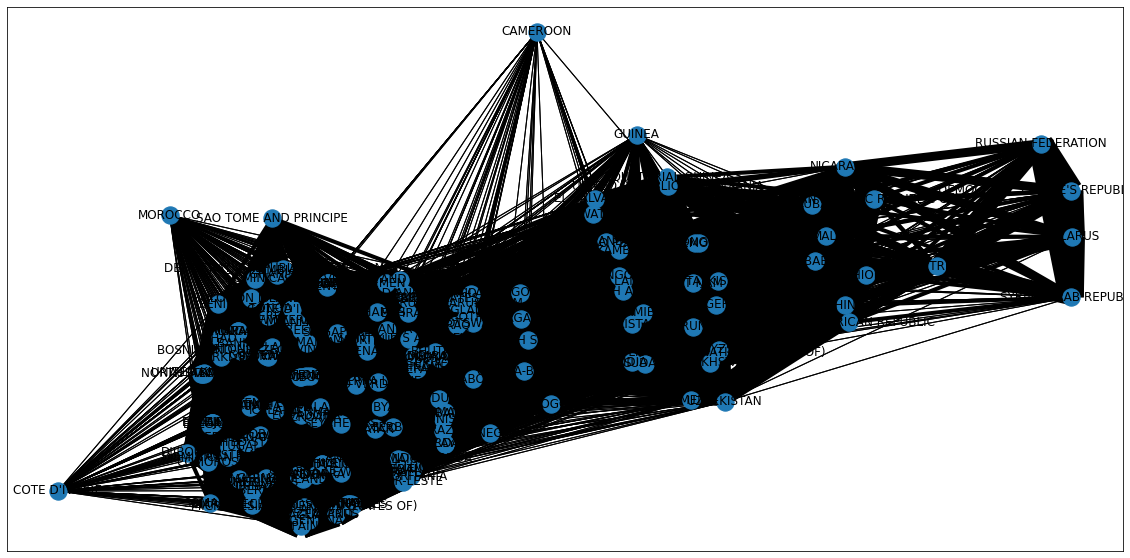

In [312]:
figure(figsize=(20, 10))

F = G.copy()
threshold = 1
F.remove_edges_from([(n1, n2) for n1, n2, w in F.edges(data="weight") if w < threshold])
#F.remove_nodes_from([(n1) for n1, n2, w in F.edges(data="weight") if w < threshold])
#nx.draw(F)
#net_table_weight.apply(lambda x: G.add_edge(x[0], x[1], weight= x[2]), axis=1)

# Для убирания отдельных нод
F12345 = nx.Graph() 
F12345.add_edges_from(F.edges(data = True))

pos = nx.spring_layout(F12345, seed=0)

for edge in F12345.edges(data='weight'):
    nx.draw_networkx_edges(F12345, pos, edgelist=[edge], width=edge[2] * edge[2])
       
nx.draw_networkx(F12345, pos) 

In [313]:
print(len(sorted(nx.connected_components(F12345))))
print(len(F12345.nodes()))

1
190


### 5. Экспорт в Gephi

In [319]:
nx.write_gexf(G, "UN_first.gexf")